imports

In [1]:
import numpy as np, sys

np.random.seed(1)

from keras.datasets import mnist



/Users/ksetdekov/Code/grokking-deep-learning/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# images, labels = (x_train[0:1000].reshape(1000,28*28) / 255,
#                   y_train[0:1000])


# one_hot_labels = np.zeros((len(labels),10))
# for i,l in enumerate(labels):
#     one_hot_labels[i][l] = 1
# labels = one_hot_labels

# test_images = x_test.reshape(len(x_test),28*28) / 255
# test_labels = np.zeros((len(y_test),10))
# for i,l in enumerate(y_test):
#     test_labels[i][l] = 1

# def tanh(x):
#     return np.tanh(x)

# def tanh2deriv(output):
#     return 1 - (output ** 2)

# def softmax(x):
#     temp = np.exp(x)
#     return temp / np.sum(temp, axis=1, keepdims=True)

# alpha, iterations = (2, 300)
# pixels_per_image, num_labels = (784, 10)
# batch_size = 128

# input_rows = 28
# input_cols = 28

# kernel_rows = 3
# kernel_cols = 3
# num_kernels = 16

# hidden_size = ((input_rows - kernel_rows) *
#                (input_cols - kernel_cols)) * num_kernels

# kernels = 0.02*np.random.random((kernel_rows*kernel_cols,
#                                  num_kernels))-0.01

# weights_1_2 = 0.2*np.random.random((hidden_size,
#                                     num_labels)) - 0.1



# def get_image_section(layer,row_from, row_to, col_from, col_to):
#     section = layer[:,row_from:row_to,col_from:col_to]
#     return section.reshape(-1,1,row_to-row_from, col_to-col_from)

# for j in range(iterations):
#     correct_cnt = 0
#     for i in range(int(len(images) / batch_size)):
#         batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
#         layer_0 = images[batch_start:batch_end]
#         layer_0 = layer_0.reshape(layer_0.shape[0],28,28)
#         layer_0.shape

#         sects = list()
#         for row_start in range(layer_0.shape[1]-kernel_rows):
#             for col_start in range(layer_0.shape[2] - kernel_cols):
#                 sect = get_image_section(layer_0,
#                                          row_start,
#                                          row_start+kernel_rows,
#                                          col_start,
#                                          col_start+kernel_cols)
#                 sects.append(sect)

#         expanded_input = np.concatenate(sects,axis=1)
#         es = expanded_input.shape
#         flattened_input = expanded_input.reshape(es[0]*es[1],-1)

#         kernel_output = flattened_input.dot(kernels)
#         layer_1 = tanh(kernel_output.reshape(es[0],-1))
#         dropout_mask = np.random.randint(2,size=layer_1.shape)
#         layer_1 *= dropout_mask * 2
#         layer_2 = softmax(np.dot(layer_1,weights_1_2))

#         for k in range(batch_size):
#             labelset = labels[batch_start+k:batch_start+k+1]
#             _inc = int(np.argmax(layer_2[k:k+1]) ==
#                                np.argmax(labelset))
#             correct_cnt += _inc

#         layer_2_delta = (labels[batch_start:batch_end]-layer_2)\
#                         / (batch_size * layer_2.shape[0])
#         layer_1_delta = layer_2_delta.dot(weights_1_2.T) * \
#                         tanh2deriv(layer_1)
#         layer_1_delta *= dropout_mask
#         weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
#         l1d_reshape = layer_1_delta.reshape(kernel_output.shape)
#         k_update = flattened_input.T.dot(l1d_reshape)
#         kernels -= alpha * k_update

#     test_correct_cnt = 0

#     for i in range(len(test_images)):

#         layer_0 = test_images[i:i+1]
#         layer_0 = layer_0.reshape(layer_0.shape[0],28,28)
#         layer_0.shape

#         sects = list()
#         for row_start in range(layer_0.shape[1]-kernel_rows):
#             for col_start in range(layer_0.shape[2] - kernel_cols):
#                 sect = get_image_section(layer_0,
#                                          row_start,
#                                          row_start+kernel_rows,
#                                          col_start,
#                                          col_start+kernel_cols)
#                 sects.append(sect)

#         expanded_input = np.concatenate(sects,axis=1)
#         es = expanded_input.shape
#         flattened_input = expanded_input.reshape(es[0]*es[1],-1)

#         kernel_output = flattened_input.dot(kernels)
#         layer_1 = tanh(kernel_output.reshape(es[0],-1))
#         layer_2 = np.dot(layer_1,weights_1_2)

#         test_correct_cnt += int(np.argmax(layer_2) ==
#                                 np.argmax(test_labels[i:i+1]))
#     if(j % 1 == 0):
#         sys.stdout.write("\n"+ \
#          "I:" + str(j) + \
#          " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
#          " Train-Acc:" + str(correct_cnt/float(len(images))))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset
from keras.datasets import mnist
from pytorch_lightning.callbacks import EarlyStopping

# Prepare data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1) / 255.0
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1) / 255.0
y_test = torch.tensor(y_test, dtype=torch.long)

train_ds = TensorDataset(x_train, y_train)
test_ds = TensorDataset(x_test, y_test)

class SimpleCNN(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 16, kernel_size=3)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(16 * 26 * 26, 10)
        self.save_hyperparameters()

        # Optional: Match NumPy initialization
        nn.init.uniform_(self.conv.weight, -0.01, 0.01)
        nn.init.uniform_(self.fc.weight, -0.1, 0.1)

    def forward(self, x):
        x = torch.tanh(self.conv(x))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        # Lower learning rate for stability
        return torch.optim.SGD(self.parameters(), lr=0.1)

batch_size = 128
num_workers = 7  # or use os.cpu_count() for all available cores

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, persistent_workers=True)
val_loader = DataLoader(test_ds, batch_size=batch_size, num_workers=num_workers, persistent_workers=True)

early_stop_callback = EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min",
    verbose=True
)

model = SimpleCNN()
if torch.cuda.is_available():
    trainer = pl.Trainer(max_epochs=300, accelerator="auto", devices="auto", callbacks=[early_stop_callback])
else:
    trainer = pl.Trainer(max_epochs=300, accelerator="auto", callbacks=[early_stop_callback])
trainer.fit(model, train_loader, val_loader)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | conv    | Conv2d  | 160    | train
1 | dropout | Dropout | 0      | train
2 | fc      | Linear  | 108 K  | train
--------------------------------------------
108 K     Trainable params
0         Non-trainable params
108 K     Total params
0.433     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 469/469 [00:06<00:00, 75.41it/s, v_num=11, train_loss=0.351, train_acc=0.875, val_loss=0.309, val_acc=0.911]

Metric val_loss improved. New best score: 0.309


Epoch 1: 100%|██████████| 469/469 [00:04<00:00, 112.05it/s, v_num=11, train_loss=0.234, train_acc=0.917, val_loss=0.289, val_acc=0.915]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.289


Epoch 2: 100%|██████████| 469/469 [00:04<00:00, 114.15it/s, v_num=11, train_loss=0.284, train_acc=0.917, val_loss=0.286, val_acc=0.921]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.286


Epoch 4: 100%|██████████| 469/469 [00:04<00:00, 112.60it/s, v_num=11, train_loss=0.410, train_acc=0.875, val_loss=0.277, val_acc=0.920]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.277


Epoch 5: 100%|██████████| 469/469 [00:04<00:00, 114.13it/s, v_num=11, train_loss=0.304, train_acc=0.927, val_loss=0.270, val_acc=0.924]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.270


Epoch 8: 100%|██████████| 469/469 [00:04<00:00, 111.36it/s, v_num=11, train_loss=0.300, train_acc=0.896, val_loss=0.266, val_acc=0.925]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.266


Epoch 10: 100%|██████████| 469/469 [00:04<00:00, 110.06it/s, v_num=11, train_loss=0.218, train_acc=0.948, val_loss=0.261, val_acc=0.927] 

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.261


Epoch 12: 100%|██████████| 469/469 [00:03<00:00, 118.25it/s, v_num=11, train_loss=0.160, train_acc=0.958, val_loss=0.245, val_acc=0.933]

Metric val_loss improved by 0.017 >= min_delta = 0.0. New best score: 0.245


Epoch 14: 100%|██████████| 469/469 [00:03<00:00, 119.28it/s, v_num=11, train_loss=0.234, train_acc=0.927, val_loss=0.234, val_acc=0.936]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 0.234


Epoch 15: 100%|██████████| 469/469 [00:03<00:00, 119.41it/s, v_num=11, train_loss=0.270, train_acc=0.917, val_loss=0.232, val_acc=0.936] 

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.232


Epoch 16: 100%|██████████| 469/469 [00:03<00:00, 119.74it/s, v_num=11, train_loss=0.246, train_acc=0.906, val_loss=0.210, val_acc=0.943]

Metric val_loss improved by 0.022 >= min_delta = 0.0. New best score: 0.210


Epoch 18: 100%|██████████| 469/469 [00:03<00:00, 118.45it/s, v_num=11, train_loss=0.254, train_acc=0.938, val_loss=0.185, val_acc=0.948] 

Metric val_loss improved by 0.025 >= min_delta = 0.0. New best score: 0.185


Epoch 19: 100%|██████████| 469/469 [00:03<00:00, 120.59it/s, v_num=11, train_loss=0.262, train_acc=0.948, val_loss=0.177, val_acc=0.951] 

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.177


Epoch 20: 100%|██████████| 469/469 [00:03<00:00, 120.64it/s, v_num=11, train_loss=0.314, train_acc=0.917, val_loss=0.165, val_acc=0.954] 

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.165


Epoch 21: 100%|██████████| 469/469 [00:03<00:00, 118.91it/s, v_num=11, train_loss=0.245, train_acc=0.927, val_loss=0.156, val_acc=0.956] 

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.156


Epoch 22: 100%|██████████| 469/469 [00:03<00:00, 119.47it/s, v_num=11, train_loss=0.199, train_acc=0.938, val_loss=0.155, val_acc=0.957] 

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.155


Epoch 23: 100%|██████████| 469/469 [00:03<00:00, 119.10it/s, v_num=11, train_loss=0.203, train_acc=0.969, val_loss=0.142, val_acc=0.959] 

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.142


Epoch 24: 100%|██████████| 469/469 [00:03<00:00, 119.08it/s, v_num=11, train_loss=0.295, train_acc=0.969, val_loss=0.137, val_acc=0.961] 

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.137


Epoch 25: 100%|██████████| 469/469 [00:03<00:00, 119.77it/s, v_num=11, train_loss=0.121, train_acc=0.979, val_loss=0.131, val_acc=0.961] 

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.131


Epoch 26: 100%|██████████| 469/469 [00:03<00:00, 118.69it/s, v_num=11, train_loss=0.158, train_acc=0.958, val_loss=0.126, val_acc=0.962] 

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.126


Epoch 27: 100%|██████████| 469/469 [00:03<00:00, 118.60it/s, v_num=11, train_loss=0.199, train_acc=0.906, val_loss=0.119, val_acc=0.965] 

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.119


Epoch 28: 100%|██████████| 469/469 [00:03<00:00, 119.44it/s, v_num=11, train_loss=0.117, train_acc=0.958, val_loss=0.118, val_acc=0.966] 

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.118


Epoch 29: 100%|██████████| 469/469 [00:03<00:00, 119.03it/s, v_num=11, train_loss=0.221, train_acc=0.958, val_loss=0.116, val_acc=0.967] 

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.116


Epoch 30: 100%|██████████| 469/469 [00:03<00:00, 119.10it/s, v_num=11, train_loss=0.223, train_acc=0.948, val_loss=0.112, val_acc=0.968] 

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.112


Epoch 31: 100%|██████████| 469/469 [00:03<00:00, 119.14it/s, v_num=11, train_loss=0.113, train_acc=0.948, val_loss=0.111, val_acc=0.967] 

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.111


Epoch 32: 100%|██████████| 469/469 [00:03<00:00, 118.49it/s, v_num=11, train_loss=0.065, train_acc=0.979, val_loss=0.107, val_acc=0.969] 

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.107


Epoch 33: 100%|██████████| 469/469 [00:03<00:00, 119.38it/s, v_num=11, train_loss=0.112, train_acc=0.969, val_loss=0.107, val_acc=0.969] 

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.107


Epoch 34: 100%|██████████| 469/469 [00:03<00:00, 119.97it/s, v_num=11, train_loss=0.175, train_acc=0.948, val_loss=0.102, val_acc=0.970] 

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.102


Epoch 36: 100%|██████████| 469/469 [00:03<00:00, 119.81it/s, v_num=11, train_loss=0.225, train_acc=0.906, val_loss=0.101, val_acc=0.970] 

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.101


Epoch 37: 100%|██████████| 469/469 [00:03<00:00, 119.46it/s, v_num=11, train_loss=0.108, train_acc=0.969, val_loss=0.0987, val_acc=0.971]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.099


Epoch 40: 100%|██████████| 469/469 [00:03<00:00, 119.94it/s, v_num=11, train_loss=0.275, train_acc=0.917, val_loss=0.0968, val_acc=0.970] 

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.097


Epoch 41: 100%|██████████| 469/469 [00:03<00:00, 119.49it/s, v_num=11, train_loss=0.234, train_acc=0.958, val_loss=0.0963, val_acc=0.971] 

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.096


Epoch 43: 100%|██████████| 469/469 [00:03<00:00, 119.65it/s, v_num=11, train_loss=0.169, train_acc=0.948, val_loss=0.0952, val_acc=0.971] 

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.095


Epoch 44: 100%|██████████| 469/469 [00:03<00:00, 119.12it/s, v_num=11, train_loss=0.196, train_acc=0.948, val_loss=0.092, val_acc=0.973]  

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.092


Epoch 46: 100%|██████████| 469/469 [00:03<00:00, 119.70it/s, v_num=11, train_loss=0.162, train_acc=0.969, val_loss=0.0906, val_acc=0.973]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.091


Epoch 48: 100%|██████████| 469/469 [00:03<00:00, 119.27it/s, v_num=11, train_loss=0.0558, train_acc=0.979, val_loss=0.090, val_acc=0.974]  

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.090


Epoch 51: 100%|██████████| 469/469 [00:03<00:00, 117.40it/s, v_num=11, train_loss=0.0281, train_acc=1.000, val_loss=0.0878, val_acc=0.973]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.088


Epoch 61: 100%|██████████| 469/469 [00:03<00:00, 118.15it/s, v_num=11, train_loss=0.197, train_acc=0.969, val_loss=0.0886, val_acc=0.974] 

Monitored metric val_loss did not improve in the last 10 records. Best score: 0.088. Signaling Trainer to stop.


Epoch 61: 100%|██████████| 469/469 [00:03<00:00, 117.98it/s, v_num=11, train_loss=0.197, train_acc=0.969, val_loss=0.0886, val_acc=0.974]


In [4]:

# After training, evaluate accuracy on train and test sets
def evaluate_accuracy(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            logits = model(x)
            preds = logits.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    return correct / total

train_acc = evaluate_accuracy(model, train_loader)
test_acc = evaluate_accuracy(model, val_loader)
print(f"\nFinal Train-Acc: {train_acc:.4f} Test-Acc: {test_acc:.4f}")




Final Train-Acc: 0.9813 Test-Acc: 0.9737


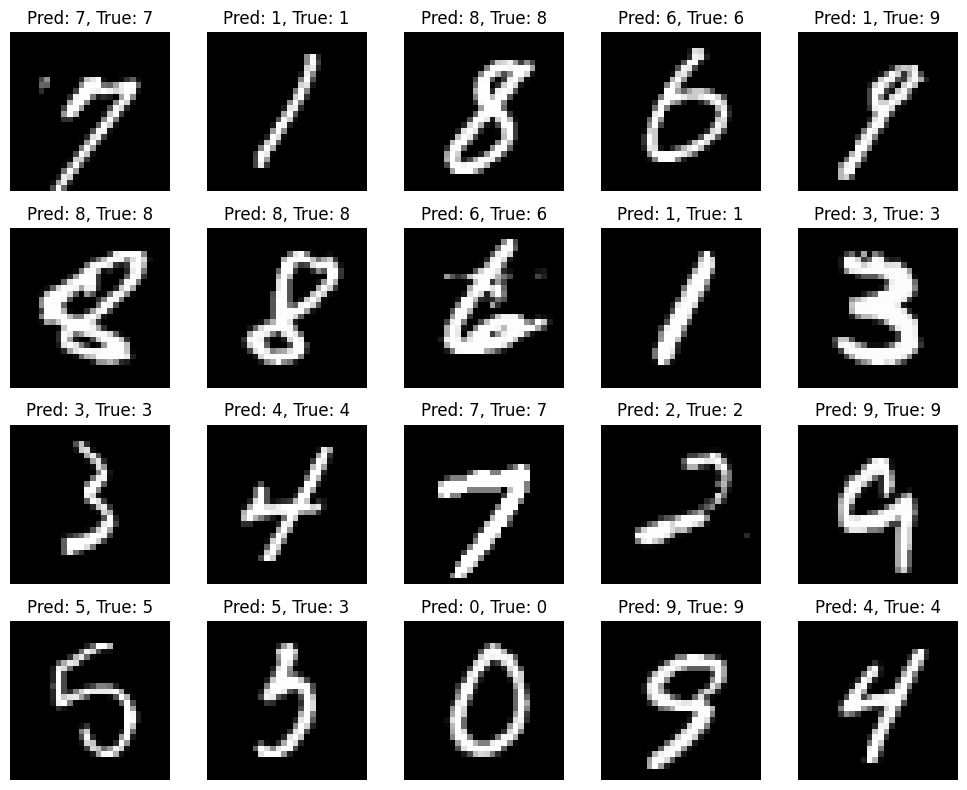

In [5]:
# draw 20 random images from the test set and their predicted labels
import matplotlib.pyplot as plt
def draw_random_images(model, dataset, num_images=20):
    indices = torch.randperm(len(dataset))[:num_images]
    images, labels = zip(*[dataset[i] for i in indices])
    images = torch.stack(images)
    
    model.eval()
    with torch.no_grad():
        logits = model(images)
        preds = logits.argmax(dim=1)

    fig, axes = plt.subplots(4, 5, figsize=(10, 8))
    for ax, img, pred, label in zip(axes.flatten(), images, preds, labels):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f"Pred: {pred.item()}, True: {label.item()}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
draw_random_images(model, test_ds, num_images=20)

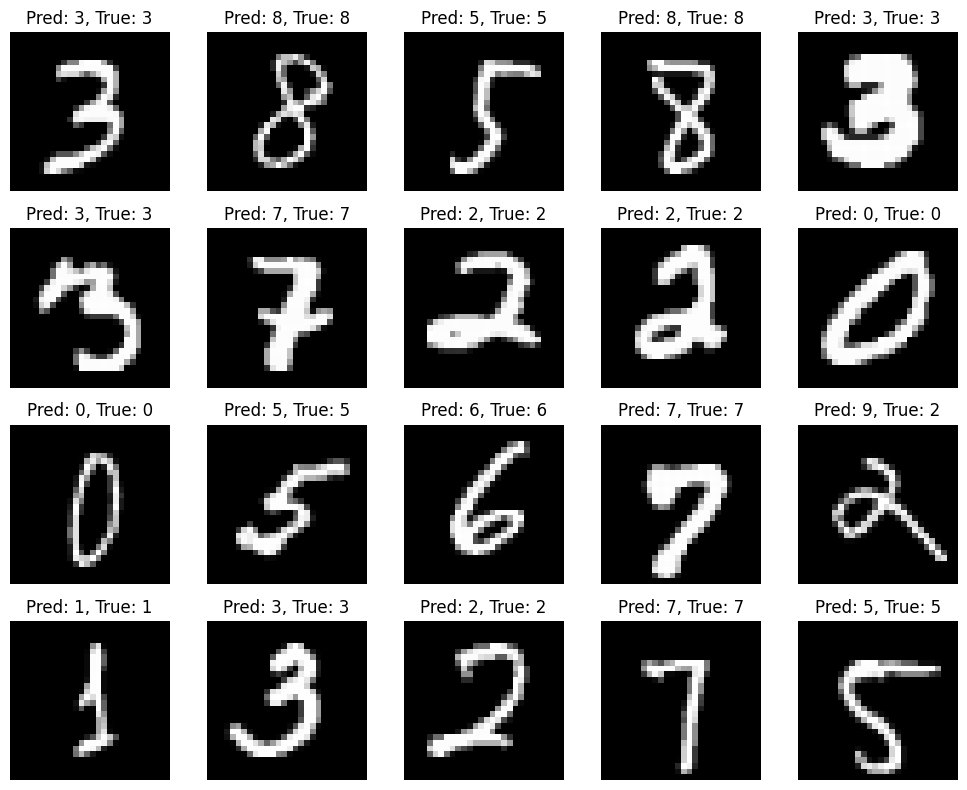

In [6]:
draw_random_images(model, test_ds, num_images=20)

In [7]:

def per_digit_accuracy(model, loader):
    model.eval()
    correct_per_class = np.zeros(10, dtype=int)
    total_per_class = np.zeros(10, dtype=int)
    with torch.no_grad():
        for x, y in loader:
            logits = model(x)
            preds = logits.argmax(dim=1)
            for label, pred in zip(y, preds):
                total_per_class[label.item()] += 1
                if label.item() == pred.item():
                    correct_per_class[label.item()] += 1
    for digit in range(10):
        acc = correct_per_class[digit] / total_per_class[digit] if total_per_class[digit] > 0 else 0
        print(f"Digit {digit}: Accuracy {acc:.4f} ({correct_per_class[digit]}/{total_per_class[digit]})")

per_digit_accuracy(model, val_loader)

Digit 0: Accuracy 0.9898 (970/980)
Digit 1: Accuracy 0.9938 (1128/1135)
Digit 2: Accuracy 0.9671 (998/1032)
Digit 3: Accuracy 0.9812 (991/1010)
Digit 4: Accuracy 0.9827 (965/982)
Digit 5: Accuracy 0.9675 (863/892)
Digit 6: Accuracy 0.9791 (938/958)
Digit 7: Accuracy 0.9630 (990/1028)
Digit 8: Accuracy 0.9651 (940/974)
Digit 9: Accuracy 0.9455 (954/1009)


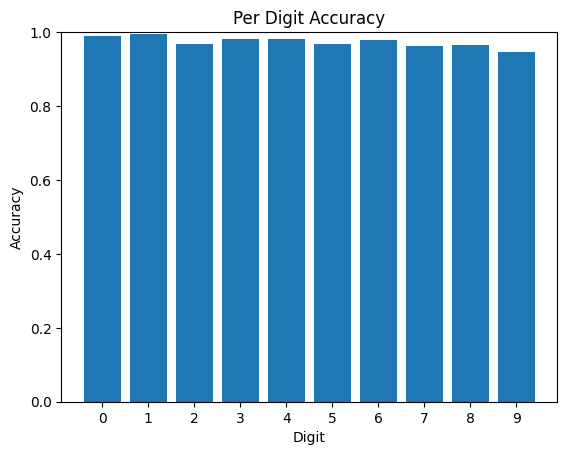

In [8]:
#plot per digit accuracy

def plot_per_digit_accuracy(model, loader):
    model.eval()
    correct_per_class = np.zeros(10, dtype=int)
    total_per_class = np.zeros(10, dtype=int)
    with torch.no_grad():
        for x, y in loader:
            logits = model(x)
            preds = logits.argmax(dim=1)
            for label, pred in zip(y, preds):
                total_per_class[label.item()] += 1
                if label.item() == pred.item():
                    correct_per_class[label.item()] += 1
    fig, ax = plt.subplots()
    ax.bar(range(10), correct_per_class / total_per_class, tick_label=range(10))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Digit")
    ax.set_ylabel("Accuracy")
    ax.set_title("Per Digit Accuracy")
    plt.show()
plot_per_digit_accuracy(model, val_loader)

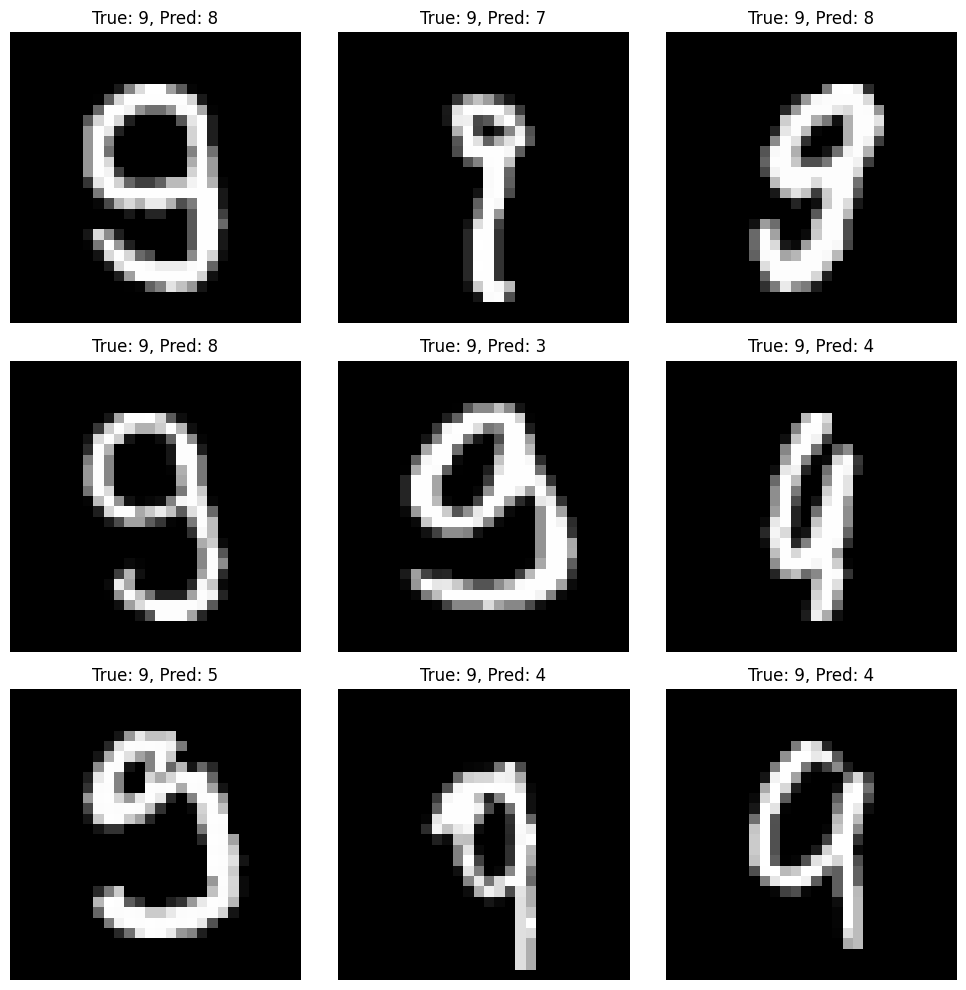

In [10]:
# show 9s that were misclassified

def show_misclassified_nines(model, dataset):
    model.eval()
    misclassified_nines = []
    with torch.no_grad():
        for x, y in dataset:
            # x: [1, 28, 28], y: scalar
            x_batch = x.unsqueeze(0)  # [1, 1, 28, 28]
            logits = model(x_batch)
            pred = logits.argmax(dim=1).item()
            if y.item() == 9 and y.item() != pred:
                misclassified_nines.append((x, y, torch.tensor(pred)))
    return misclassified_nines

misclassified_nines = show_misclassified_nines(model, test_ds)
def plot_misclassified_nines(misclassified_nines):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for ax, (img, label, pred) in zip(axes.flatten(), misclassified_nines[:9]):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f"True: {label.item()}, Pred: {pred.item()}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plot_misclassified_nines(misclassified_nines)